In [1]:
""" Create tables with aqueduct 30 categories vs aqueduct 21.
-------------------------------------------------------------------------------

The results of the previous script are exported to separate csv scripts. Here
we combine the various files into one dataframe per indicator.

Todo:
- Loop over indicators
- Save figure as jpg
- Save data as csv

Calculate area under the curve: 
https://stackoverflow.com/questions/56446533/how-do-i-get-the-sum-of-values-under-a-diagonal-in-numpy/56448158#56448158

Author: Rutger Hofste
Date: 20190523
Kernel: python35
Docker: rutgerhofste/gisdocker:ubuntu16.04

"""

TESTING = 0

SCRIPT_NAME = "Y2019M05D23_RH_AQ30VS21_Combine_Tables_V01"
OUTPUT_VERSION = 4

GCS_INPUT_PATH = "gs://aqueduct30_v01/Y2019M05D22_RH_AQ30VS21_Compare_Tables_V01/output_V05"
INPUT_VERSION = 5

INDICATORS = {"owr_score":"DEFAULT",
              "bws_score":"BWS_s",
              "iav_score":"WSV_s",
              "sev_score":"SV_s"}
HUMAN_READABLE = {"owr_score":"Overall water risk",
              "bws_score":"Baseline water stress",
              "iav_score":"Interannual variability",
              "sev_score":"Seasonal variability"}


ec2_input_path = "/volumes/data/{}/input_V{:02.0f}".format(SCRIPT_NAME,OUTPUT_VERSION) 
ec2_output_path =  "/volumes/data/{}/output_V{:02.0f}".format(SCRIPT_NAME,OUTPUT_VERSION) 

s3_output_path = "s3://wri-projects/Aqueduct30/Aq30vs21/{}/output_V{:02.0f}/".format(SCRIPT_NAME,OUTPUT_VERSION)

print("GCS_INPUT_PATH: " + GCS_INPUT_PATH +
      "\nec2_input_path: " + ec2_input_path +
      "\nec2_output_path: " + ec2_output_path+ 
      "\ns3_output_path: " + s3_output_path)

GCS_INPUT_PATH: gs://aqueduct30_v01/Y2019M05D22_RH_AQ30VS21_Compare_Tables_V01/output_V05
ec2_input_path: /volumes/data/Y2019M05D23_RH_AQ30VS21_Combine_Tables_V01/input_V04
ec2_output_path: /volumes/data/Y2019M05D23_RH_AQ30VS21_Combine_Tables_V01/output_V04
s3_output_path: s3://wri-projects/Aqueduct30/Aq30vs21/Y2019M05D23_RH_AQ30VS21_Combine_Tables_V01/output_V04/


In [2]:
import time, datetime, sys
dateString = time.strftime("Y%YM%mD%d")
timeString = time.strftime("UTC %H:%M")
start = datetime.datetime.now()
print(dateString,timeString)
sys.version

Y2019M10D10 UTC 10:39


'3.5.4 |Anaconda, Inc.| (default, Nov 20 2017, 18:44:38) \n[GCC 7.2.0]'

In [3]:
!rm -r {ec2_input_path}
!rm -r {ec2_output_path}
!mkdir -p {ec2_input_path}
!mkdir -p {ec2_output_path}

rm: cannot remove '/volumes/data/Y2019M05D23_RH_AQ30VS21_Combine_Tables_V01/input_V04': No such file or directory
rm: cannot remove '/volumes/data/Y2019M05D23_RH_AQ30VS21_Combine_Tables_V01/output_V04': No such file or directory


In [4]:
!gsutil -m cp -r {GCS_INPUT_PATH}/* {ec2_input_path}

Copying gs://aqueduct30_v01/Y2019M05D22_RH_AQ30VS21_Compare_Tables_V01/output_V05/bws_score_BWS_s_aq30lower0_aq21lower0_V05ee_export.csv...
Copying gs://aqueduct30_v01/Y2019M05D22_RH_AQ30VS21_Compare_Tables_V01/output_V05/bws_score_BWS_s_aq30lower0_aq21lower1_V05ee_export.csv...
Copying gs://aqueduct30_v01/Y2019M05D22_RH_AQ30VS21_Compare_Tables_V01/output_V05/bws_score_BWS_s_aq30lower0_aq21lower2_V05ee_export.csv...
Copying gs://aqueduct30_v01/Y2019M05D22_RH_AQ30VS21_Compare_Tables_V01/output_V05/bws_score_BWS_s_aq30lower0_aq21lower3_V05ee_export.csv...
Copying gs://aqueduct30_v01/Y2019M05D22_RH_AQ30VS21_Compare_Tables_V01/output_V05/bws_score_BWS_s_aq30lower0_aq21lower4_V05ee_export.csv...
Copying gs://aqueduct30_v01/Y2019M05D22_RH_AQ30VS21_Compare_Tables_V01/output_V05/bws_score_BWS_s_aq30lower1_aq21lower0_V05ee_export.csv...
Copying gs://aqueduct30_v01/Y2019M05D22_RH_AQ30VS21_Compare_Tables_V01/output_V05/bws_score_BWS_s_aq30lower1_aq21lower1_V05ee_export.csv...
Copying gs://aqueduc

Copying gs://aqueduct30_v01/Y2019M05D22_RH_AQ30VS21_Compare_Tables_V01/output_V05/sev_score_SV_s_aq30lower1_aq21lower0_V05ee_export.csv...
Copying gs://aqueduct30_v01/Y2019M05D22_RH_AQ30VS21_Compare_Tables_V01/output_V05/sev_score_SV_s_aq30lower1_aq21lower1_V05ee_export.csv...
Copying gs://aqueduct30_v01/Y2019M05D22_RH_AQ30VS21_Compare_Tables_V01/output_V05/sev_score_SV_s_aq30lower1_aq21lower2_V05ee_export.csv...
Copying gs://aqueduct30_v01/Y2019M05D22_RH_AQ30VS21_Compare_Tables_V01/output_V05/sev_score_SV_s_aq30lower1_aq21lower3_V05ee_export.csv...
Copying gs://aqueduct30_v01/Y2019M05D22_RH_AQ30VS21_Compare_Tables_V01/output_V05/sev_score_SV_s_aq30lower1_aq21lower4_V05ee_export.csv...
Copying gs://aqueduct30_v01/Y2019M05D22_RH_AQ30VS21_Compare_Tables_V01/output_V05/sev_score_SV_s_aq30lower2_aq21lower0_V05ee_export.csv...
Copying gs://aqueduct30_v01/Y2019M05D22_RH_AQ30VS21_Compare_Tables_V01/output_V05/sev_score_SV_s_aq30lower2_aq21lower1_V05ee_export.csv...
Copying gs://aqueduct30_v01

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
aq21_lower_bounds = [0,1,2,3,4]
aq30_lower_bounds = [0,1,2,3,4]

In [7]:
def dataframe_to_array(df,aq30_indicator,aq21_lower_bounds,aq30_lower_bounds):
    """
    Coverts the dataframe format to a numpy array suitable for plotting
    The 0 dimension (x) represent the lower bounds of Aqueduct 2.1
    The 1st dimension (y) represents the lower bounds of Aqueduct 3.0
    
    """
    
    a = np.empty((len(aq21_lower_bounds),len(aq30_lower_bounds)))
    a[:] =  np.nan
    
    for y in aq30_lower_bounds:
        for x in aq21_lower_bounds:
            z = df.loc[(df["aq30_indicator"]== aq30_indicator) & (df["aq21_lower_bound"]== x) & (df["aq30_lower_bound"]== y)]["b1"][0]
            a[x,y] = z
    return a

def plot_array(a,indicator):
    # Based on https://stackoverflow.com/questions/33828780/matplotlib-display-array-values-with-imshow
    
    indicator_readable =  HUMAN_READABLE[indicator]
    
    x_start = -0.5
    x_end = 4.5
    y_start = -0.5
    y_end = 4.5
    extent = [x_start, x_end, y_start, y_end]

    size = a_fraction.shape[0]

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)
    title = "{}: Fraction of area in different risk categories".format(indicator_readable)
    fig.suptitle(title, fontsize=12)
    a_percentage = a_fraction*100
    im = ax.imshow(a_percentage, extent=extent, origin='lower', interpolation='None', cmap='Greens')

    # Add the text
    jump_x = (x_end - x_start) / (2.0 * size)
    jump_y = (y_end - y_start) / (2.0 * size)
    x_positions = np.linspace(start=x_start, stop=x_end, num=size, endpoint=False)
    y_positions = np.linspace(start=y_start, stop=y_end, num=size, endpoint=False)

    for y_index, y in enumerate(y_positions):
        for x_index, x in enumerate(x_positions):
            label = a_fraction[y_index, x_index]
            label = label * 100
            label = "{:0.0f}%".format(label)
            text_x = x + jump_x
            text_y = y + jump_y
            ax.text(text_x, text_y, label, color='black', ha='center', va='center')


    ax.set_xticklabels(["none","Low","Low-Medium","Medium-High","High","Extremely High"])
    ax.set_yticklabels(["none","Low","Low-Medium","Medium-High","High","Extremely High"])  

    plt.xlabel('Aqueduct 2.1 Category', fontsize=12)
    plt.ylabel('Aqueduct 3.0 Category', fontsize=12)
    
    fig.colorbar(im,fraction=0.046, pad=0.04)
    plt.tight_layout()
    
    return fig





In [8]:
listje = []
for aq30_indicator, aq21_indicator in INDICATORS.items():
    for aq30_lower_bound in aq30_lower_bounds:
        for aq21_lower_bound in aq21_lower_bounds:
            filename  = "{}_{}_aq30lower{}_aq21lower{}_V{:02d}ee_export.csv".format(aq30_indicator,aq21_indicator,aq30_lower_bound,aq21_lower_bound,INPUT_VERSION)
            input_path = "{}/{}".format(ec2_input_path,filename)
            df = pd.read_csv(input_path)
            listje.append(df)

In [9]:
df_total = pd.concat(listje, axis=0)

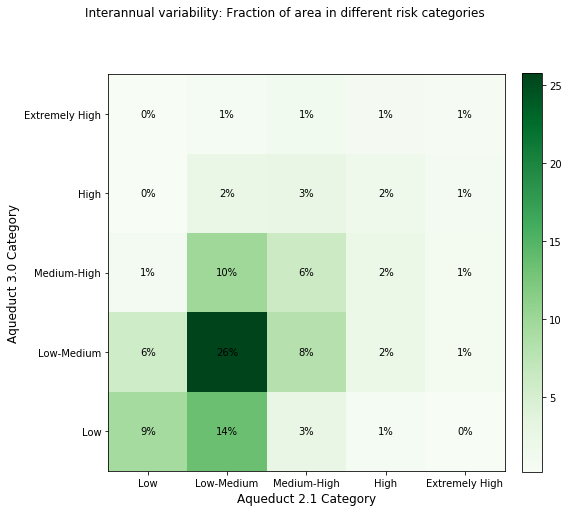

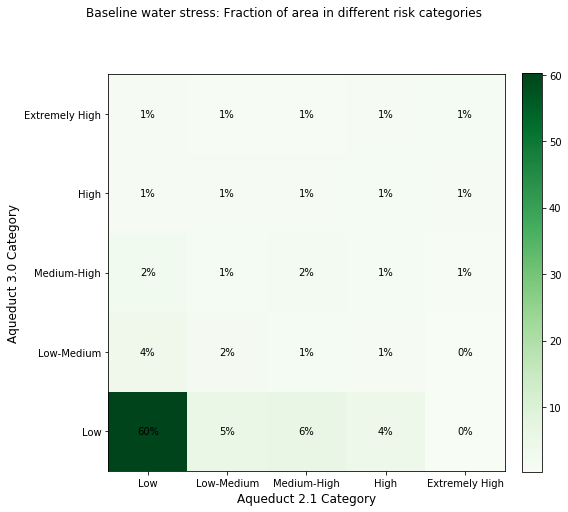

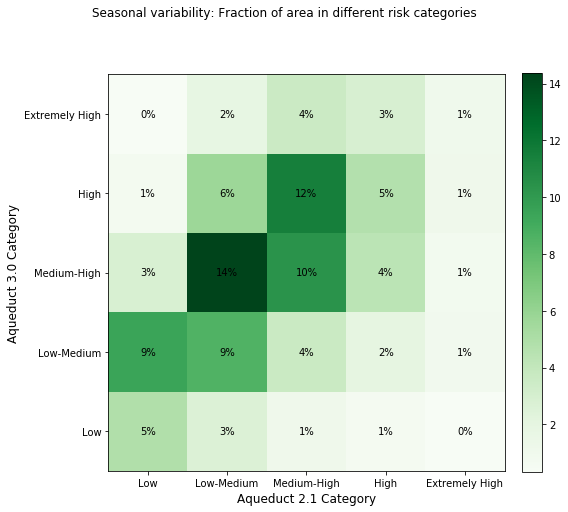

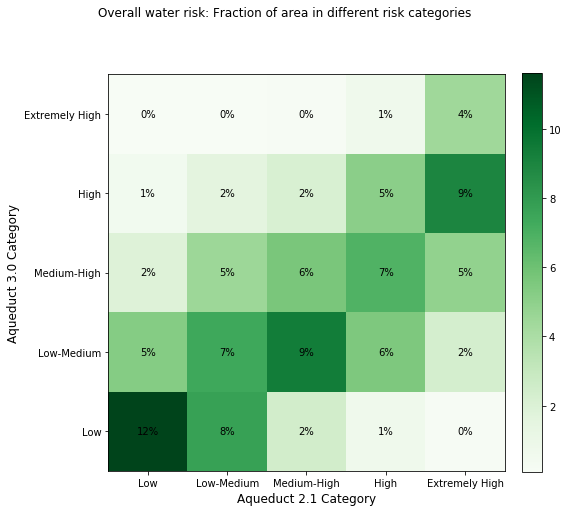

In [10]:
for aq30_indicator, aq21_indicator in INDICATORS.items():
    a = dataframe_to_array(df_total,aq30_indicator,aq21_lower_bounds,aq30_lower_bounds)
    filename = aq30_indicator
    output_path_csv = "{}/{}.csv".format(ec2_output_path,filename)
    np.savetxt(output_path_csv, a, delimiter=",")
    a_fraction = a/a.sum()
    fig = plot_array(a_fraction,aq30_indicator)
    filename = aq30_indicator
    output_path = "{}/{}.png".format(ec2_output_path,filename)
    fig.savefig(output_path)

In [11]:
!aws s3 cp {ec2_output_path} {s3_output_path} --recursive

upload: ../../../../../data/Y2019M05D23_RH_AQ30VS21_Combine_Tables_V01/output_V04/owr_score.csv to s3://wri-projects/Aqueduct30/Aq30vs21/Y2019M05D23_RH_AQ30VS21_Combine_Tables_V01/output_V04/owr_score.csv
upload: ../../../../../data/Y2019M05D23_RH_AQ30VS21_Combine_Tables_V01/output_V04/sev_score.csv to s3://wri-projects/Aqueduct30/Aq30vs21/Y2019M05D23_RH_AQ30VS21_Combine_Tables_V01/output_V04/sev_score.csv
upload: ../../../../../data/Y2019M05D23_RH_AQ30VS21_Combine_Tables_V01/output_V04/bws_score.csv to s3://wri-projects/Aqueduct30/Aq30vs21/Y2019M05D23_RH_AQ30VS21_Combine_Tables_V01/output_V04/bws_score.csv
upload: ../../../../../data/Y2019M05D23_RH_AQ30VS21_Combine_Tables_V01/output_V04/iav_score.csv to s3://wri-projects/Aqueduct30/Aq30vs21/Y2019M05D23_RH_AQ30VS21_Combine_Tables_V01/output_V04/iav_score.csv
upload: ../../../../../data/Y2019M05D23_RH_AQ30VS21_Combine_Tables_V01/output_V04/sev_score.png to s3://wri-projects/Aqueduct30/Aq30vs21/Y2019M05D23_RH_AQ30VS21_Combine_Tables_V01/

In [12]:
end = datetime.datetime.now()
elapsed = end - start
print(elapsed)

0:00:07.289013


Previous Runs:  
0:00:07.450879

In [13]:
s3_output_path

's3://wri-projects/Aqueduct30/Aq30vs21/Y2019M05D23_RH_AQ30VS21_Combine_Tables_V01/output_V04/'